<a href="https://colab.research.google.com/github/SarrourMj/YOLO/blob/main/Fine_Tuning_de_YOLOv8m_pose_pour_l'estimation_de_pose_animale_(Macaques).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                ***Projet : Fine-tuning de YOLOv8m-pose pour l'estimation de pose animale (Macaques)***


### **Membres du projet** :  Bouhari Fatma - Mejdi Sarra

##***1. Contexte général***

L’estimation de pose est une problématique clé en vision par ordinateur, visant à prédire la position des articulations d’un être vivant à partir d’une image. Traditionnellement appliquée à l’humain, cette approche s’étend aujourd’hui aux animaux pour soutenir des domaines comme la biomécanique, la zoologie, ou l’éthologie.

Avec l’émergence de modèles préentraînés puissants tels que YOLOv8-pose, il est désormais possible d’adapter rapidement ces architectures complexes à de nouveaux types de données grâce à une technique appelée **fine-tuning**.

##***2 Fondement du projet : Modèle, Données et Approche analytique***

Ce projet repose sur trois composantes clés :

- **Modèle utilisé :**  
  *YOLOv8m-pose*, un modèle léger et performant conçu pour l’estimation de pose.

- **Données :**  
  Le dataset *MacaquePose*, contenant des images annotées de singes macaques avec 17 keypoints corporels.

- **Fine-tuning :**  
  Un entraînement spécifique du modèle pré-entraîné, adapté aux particularités morphologiques des macaques.

=> Pour évaluer l'efficacité de notre fine-tuning, **deux types d'analyses complémentaires ont été menées** :

-  **Analyse quantitative** : à travers les métriques d’évaluation (précision, rappel, mAP50, mAP50-95), visualisées sur les 8 epochs d’entraînement.

-  **Analyse qualitative** : via l’observation directe des keypoints prédits sur les images, permettant une validation visuelle des performances du modèle.

Ces deux volets forment ensemble une évaluation complète du modèle YOLOv8m-pose appliqué à l’estimation de pose animale.


##***2. Architecture et démarche adoptée***


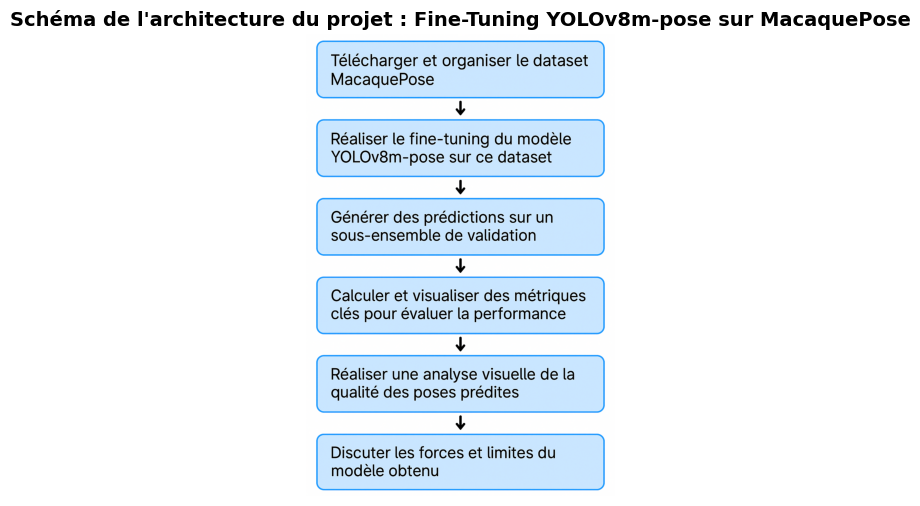

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#  Charger et afficher l'image du schéma
img = mpimg.imread('archi.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Schéma de l'architecture du projet : Fine-Tuning YOLOv8m-pose sur MacaquePose", fontsize=14, fontweight='bold')
plt.show()





On commence maintenant le travail pratique étape par étape :



## **Montage de Google Drive : Permet d’accéder au dataset stocké sur Google Drive.**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Extraction des Données du Dataset MacaquePose**



In [ ]:
!unzip "/content/drive/MyDrive/macaquepose_v1.zip" -d "/content/drive/MyDrive/macaquepose_v1_unzipped"


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooA_1130.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooB_1201.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooA_0895.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooC_0804.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooD_0765.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooB_0273.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooB_0196.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooD_1564.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooA_1377.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1/images/ZooD_1509.jpg  
  inflating: /content/drive/MyDrive/macaquepose_v1_unzipped/v1

##**Vérification de l’Intégrité des Fichiers Extraits et Organisation du Dataset**

In [ ]:
# Vérifier que les fichiers sont bien extraits
!ls "/content/drive/MyDrive/macaquepose_v1_unzipped"

v1


In [ ]:
!ls "/content/drive/MyDrive/macaquepose_v1_unzipped/v1"

annotations.csv		 images			     readme.txt
example_visualize.ipynb  info_openimagesdataset.csv


##**Installation des Dépendances Ultralytics et Environnement de Travail**

In [ ]:
!pip install ultralytics pyyaml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvi


------


# **Charger Annotations**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

# ========== Charger Annotations ==========
df = pd.read_csv("/content/drive/MyDrive/macaquepose_v1_unzipped/v1/annotations.csv")
df = df.rename(columns={"keypoinbts": "keypoints"})



# ***Analyse exploratoire (EDA) de  dataset des annotations:***

**But :** Comprendre la qualité des données.

**Étapes :**

-Distribution des images valides/incomplètes.

-Histogrammes des dimensions des bounding boxes.

-Camembert sur la qualité des images.

-Barplot des keypoints manquants.

**Difficulté :**

-Problème identifié : Beaucoup d'images avec des keypoints manquants.

-Impact : Cela peut réduire la performance du modèle.

## **Distribution des images valides vs invalides**

Nombre d'images complètement valides (17/17 keypoints) : 1181
Nombre d'images partiellement valides (<17 keypoints) : 11902


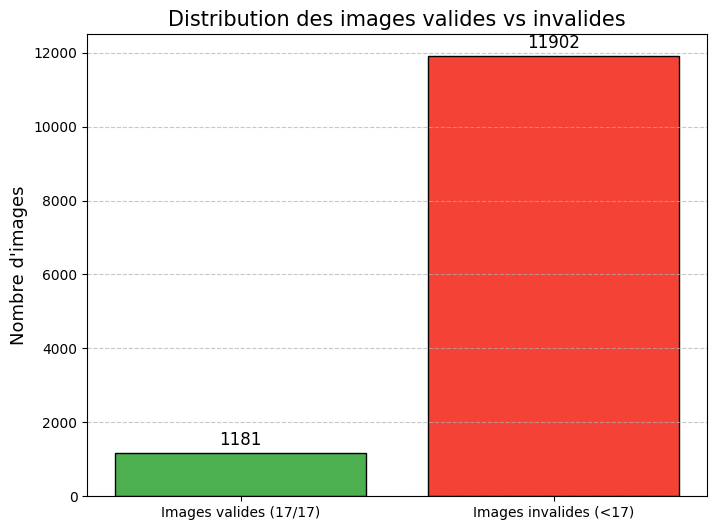

In [ ]:
# ========== Extraction et Préparation ==========
completely_valid = 0
partially_valid = 0
keypoints_list = []

for idx, row in df.iterrows():
    try:
        kpts = json.loads(row['keypoints'].replace("'", "\""))
        kpts = kpts[0]

        visibilities = []

        for kp in kpts:
            if kp["position"] is not None:
                visibilities.append(1)
            else:
                visibilities.append(0)

        keypoints_list.append(visibilities)

        if all(visibilities):
            completely_valid += 1
        else:
            partially_valid += 1

    except Exception as e:
        continue

keypoints_array = np.array(keypoints_list)

# ========== Résultat Nombre Images ==========
print(f"Nombre d'images complètement valides (17/17 keypoints) : {completely_valid}")
print(f"Nombre d'images partiellement valides (<17 keypoints) : {partially_valid}")

# ========== Affichage d'un Graphique Stylé ==========
labels = ['Images valides (17/17)', 'Images invalides (<17)']
values = [completely_valid, partially_valid]
colors = ['#4CAF50', '#F44336']

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(labels, values, color=colors, edgecolor='black')

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),  # Décalage vertical
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

ax.set_ylabel('Nombre d\'images', fontsize=13)
ax.set_title('Distribution des images valides vs invalides', fontsize=15)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Interprétation :**
 Un grand nombre d'images partiellement valides indique des données bruitées ou incomplètes.

=>Cela peut affecter les performances du modèle YOLOv8-Pose.



## **2. Histogrammes Largeur / Hauteur des BBox**

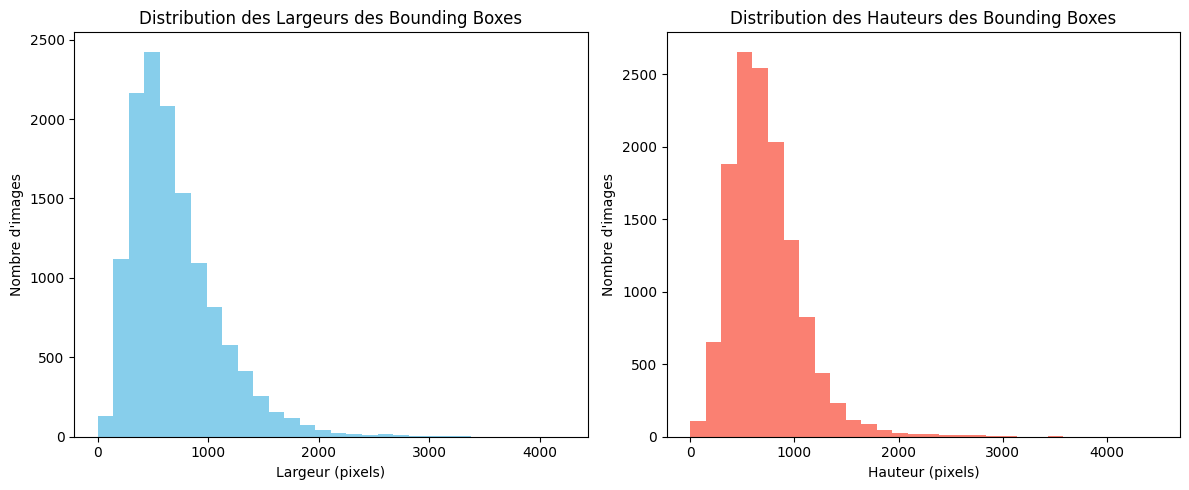

In [ ]:
# ========== 2. Histogrammes Largeur / Hauteur des BBox ==========
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(bbox_widths, bins=30, color='skyblue')
plt.title("Distribution des Largeurs des Bounding Boxes")
plt.xlabel("Largeur (pixels)")
plt.ylabel("Nombre d'images")

plt.subplot(1,2,2)
plt.hist(bbox_heights, bins=30, color='salmon')
plt.title("Distribution des Hauteurs des Bounding Boxes")
plt.xlabel("Hauteur (pixels)")
plt.ylabel("Nombre d'images")

plt.tight_layout()
plt.show()


**Interprétation :**
-Une large variation dans les dimensions peut compliquer l'apprentissage du modèle.

-Les petites bounding boxes peuvent être difficiles à détecter.

**Solution :** Nécessité de normaliser les dimensions pour YOLOv8.

## **3. Camembert Qualité des images**

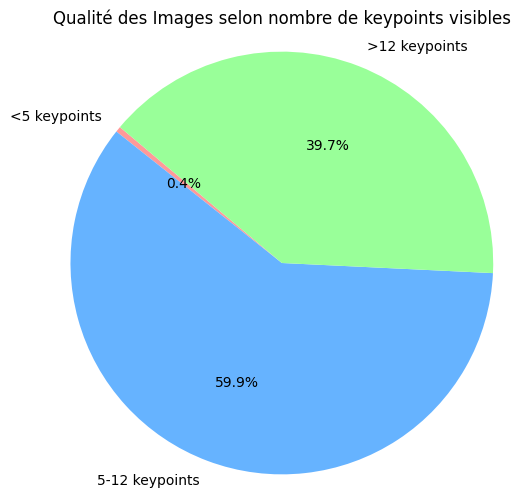

In [ ]:
# ========== 3. Camembert Qualité des images ==========
quality_labels = ['<5 keypoints', '5-12 keypoints', '>12 keypoints']
quality_counts = [
    np.sum((keypoints_array.sum(axis=1)) < 5),
    np.sum((keypoints_array.sum(axis=1)) >=5 & (keypoints_array.sum(axis=1) <=12)),
    np.sum((keypoints_array.sum(axis=1)) > 12)
]

plt.figure(figsize=(6,6))
plt.pie(quality_counts, labels=quality_labels, autopct='%1.1f%%', startangle=140, colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Qualité des Images selon nombre de keypoints visibles")
plt.axis('equal')
plt.show()

**Interprétation :**
-Une proportion élevée d'images avec peu de keypoints visibles peut réduire la précision des prédictions.

**Solution  :** Les images de faible qualité doivent être exclues ou corrigées.

## **4. Barplot Keypoints non valides**

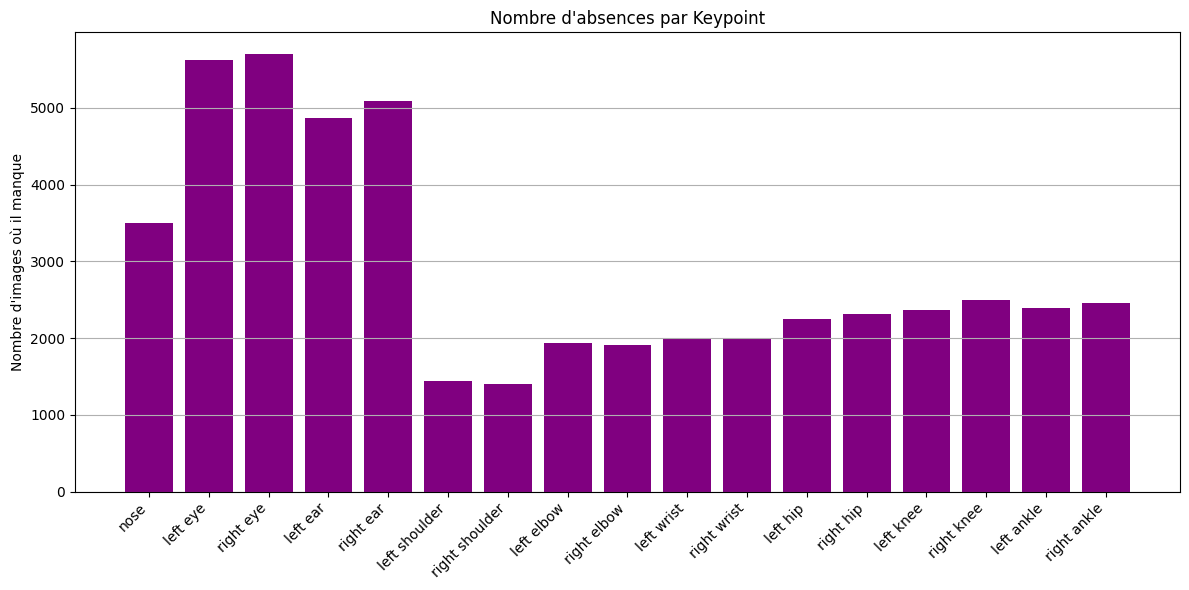

In [ ]:
# ========== 4. Barplot Keypoints non valides ==========
keypoints_names = ["nose", "left eye", "right eye", "left ear", "right ear",
                   "left shoulder", "right shoulder", "left elbow", "right elbow",
                   "left wrist", "right wrist", "left hip", "right hip",
                   "left knee", "right knee", "left ankle", "right ankle"]

missing_counts = (keypoints_array == 0).sum(axis=0)

plt.figure(figsize=(12,6))
plt.bar(keypoints_names, missing_counts, color='purple')
plt.xticks(rotation=45, ha='right')
plt.title("Nombre d'absences par Keypoint")
plt.ylabel("Nombre d'images où il manque")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Interprétation :**
Certains keypoints sont plus souvent manquants, ce qui peut biaiser le modèle.

**Solution  :** Identifier et traiter les keypoints les plus problématiques.


## **Nettoyage et préparation d'un subset propre pour l'entraînement:**

###  Objectif : Créer un sous-ensemble de données propre pour l'entraînement

**Approche choisie :**  
Afin de garantir un apprentissage de qualité, nous avons construit un *subset* nommé `macaquepose_subset`, contenant uniquement les images dont **tous les keypoints sont valides**.

=>C’est la méthode la plus fiable pour éviter les erreurs d’apprentissage liées à des labels incomplets ou corrompus. Cela permet aussi un fine-tuning efficace, sans bruit dans les données.

**Étapes réalisées :**
- Filtrage rigoureux des annotations pour ne conserver que les images avec des keypoints complets.
- Conversion des annotations au format **YOLOv8 Pose** (56 valeurs par ligne).
- Organisation du dataset dans une structure claire (`images/`, `labels/`, `dataset.yaml`), compatible avec Ultralytics.




## **Visualisation des annotations (Bounding Box + Keypoints) sur les images du subset:**

In [ ]:
import os
import shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import numpy as np
import random

# ========== CONFIGURATION ==========
# Dossiers
v1_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/v1"
subset_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset"

images_dir = os.path.join(subset_dir, "images")
labels_dir = os.path.join(subset_dir, "labels")
verified_dir = os.path.join(subset_dir, "verified")

# Vider subset images et labels
for folder in [images_dir, labels_dir, verified_dir]:
    os.makedirs(folder, exist_ok=True)
    for f in os.listdir(folder):
        os.remove(os.path.join(folder, f))

# ========== Charger Annotations ==========
df = pd.read_csv(os.path.join(v1_dir, "annotations.csv"))
df = df.rename(columns={"keypoinbts": "keypoints"})

# ========== Extraction des images complètement valides ==========
valid_rows = []

for idx, row in df.iterrows():
    try:
        kpts = json.loads(row['keypoints'].replace("'", "\""))
        kpts = kpts[0]

        if all(kp["position"] is not None for kp in kpts):
            valid_rows.append(row)
    except:
        continue

print(f"✅ Nombre d'images complètement valides trouvées : {len(valid_rows)}")

# ========== Conversion ==========
for row in valid_rows:
    img_name = row['image file name']
    img_path = os.path.join(v1_dir, "images", img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    h, w = img.shape[:2]

    # Keypoints
    keypoints = json.loads(row['keypoints'].replace("'", "\""))
    keypoints = keypoints[0]

    points = []
    for kp in keypoints:
        x, y = kp["position"]
        points.extend([x / w, y / h, 2])  # 2 = visible

    # Save txt
    with open(os.path.join(labels_dir, img_name.replace('.jpg', '.txt')), 'w') as f:
        f.write("0 " + " ".join(map(str, points)))

    # Copier l'image
    cv2.imwrite(os.path.join(images_dir, img_name), img)

print("✅ Images et labels générés dans subset.")

# ========== Vérification sur 20 images ==========
sample_images = random.sample(os.listdir(images_dir), 20)

# Générer couleurs différentes pour chaque keypoint
def generate_colors(n):
    random.seed(42)
    return [(random.random(), random.random(), random.random()) for _ in range(n)]

colors = generate_colors(17)

# Affichage
plt.figure(figsize=(20, 20))

for idx, img_name in enumerate(sample_images):
    img_path = os.path.join(images_dir, img_name)
    label_path = os.path.join(labels_dir, img_name.replace('.jpg', '.txt'))

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    with open(label_path) as f:
        kpts = np.array(list(map(float, f.read().split()[1:]))).reshape(-1, 3)

    plt.subplot(5, 4, idx+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name, fontsize=8)

    xs = []
    ys = []

    for i, (x, y, v) in enumerate(kpts):
        if v > 0:
            abs_x, abs_y = int(x * w), int(y * h)
            xs.append(abs_x)
            ys.append(abs_y)
            plt.scatter(abs_x, abs_y, color=colors[i], s=50)

    if xs and ys:
        x_min, x_max = min(xs), max(xs)
        y_min, y_max = min(ys), max(ys)

        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='cyan',
            facecolor='none'
        )
        plt.gca().add_patch(rect)

plt.tight_layout()
plt.show()


# **Conversion des annotations en format YOLOv8 Pose (fichier .txt avec 56 valeurs)**



**But :** Convertir les annotations en format YOLOv8 ( 56 valeurs).

**Étapes :** Normalisation des coordonnées et sauvegarde des fichiers .txt.

**Difficulté :** Vérification que chaque fichier contient exactement 56 valeurs.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import random

# ========== CONFIGURATION ==========

v1_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/v1"
subset_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset"

images_dir = os.path.join(subset_dir, "images")
labels_dir = os.path.join(subset_dir, "labels")
verified_dir = os.path.join(subset_dir, "verified")

for folder in [images_dir, labels_dir, verified_dir]:
    os.makedirs(folder, exist_ok=True)
    for f in os.listdir(folder):
        os.remove(os.path.join(folder, f))

# ========== Charger Annotations ==========
df = pd.read_csv(os.path.join(v1_dir, "annotations.csv"))
df = df.rename(columns={"keypoinbts": "keypoints"})

# ========== Extraction des images complètement valides ==========
valid_rows = []

for idx, row in df.iterrows():
    try:
        kpts = json.loads(row['keypoints'].replace("'", "\""))
        kpts = kpts[0]

        if all(kp["position"] is not None for kp in kpts):
            valid_rows.append(row)
    except:
        continue

print(f"✅ Nombre d'images complètement valides trouvées : {len(valid_rows)}")

# ========== Conversion labels YOLOv8 pose ==========
for row in valid_rows:
    img_name = row['image file name']
    img_path = os.path.join(v1_dir, "images", img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    h, w = img.shape[:2]

    # Keypoints
    keypoints = json.loads(row['keypoints'].replace("'", "\""))
    keypoints = keypoints[0]

    xs, ys, vis = [], [], []
    normalized = []

    for kp in keypoints:
        if kp["position"] is not None:
            x, y = kp["position"]
            xs.append(x)
            ys.append(y)
            vis.append(2)  # vis=2 pour visible
        else:
            xs.append(0)
            ys.append(0)
            vis.append(0)

    # Calcul de la bounding box normale
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)

    center_x = (x_min + x_max) / 2 / w
    center_y = (y_min + y_max) / 2 / h
    bbox_width = (x_max - x_min) / w
    bbox_height = (y_max - y_min) / h

    output = [0, center_x, center_y, bbox_width, bbox_height]  # classe + bbox

    # Ajouter les keypoints normalisés
    for x, y, v in zip(xs, ys, vis):
        output.extend([x / w, y / h, v])

    # Sauver fichier
    with open(os.path.join(labels_dir, img_name.replace('.jpg', '.txt')), 'w') as f:
        f.write(" ".join(map(lambda x: str(round(x, 6)), output)))

    # Copier l'image
    cv2.imwrite(os.path.join(images_dir, img_name), img)

print("✅ Labels YOLOv8 Pose correctement générés avec 56 valeurs chacun.")


✅ Nombre d'images complètement valides trouvées : 1181
✅ Labels YOLOv8 Pose correctement générés avec 56 valeurs chacun.


# **Vérification de la cohérence entre les images et leurs labels**

In [ ]:
import os

#  Chemins corrects
images_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/images"
labels_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/labels"

# Liste des images et des labels
images = sorted([os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
labels = sorted([os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.lower().endswith('.txt')])

# Vérification
missing_labels = set(images) - set(labels)
missing_images = set(labels) - set(images)

if missing_labels:
    print(f"{len(missing_labels)} images n'ont pas de fichier label associé :")
    for img in missing_labels:
        print(f"- {img}")
else:
    print("✅ Toutes les images ont leur fichier label.")

if missing_images:
    print(f" {len(missing_images)} labels n'ont pas d'image associée :")
    for lbl in missing_images:
        print(f"- {lbl}")
else:
    print("✅ Tous les labels correspondent à une image.")

# Résumé
print(f"\n📊 Résumé : {len(images)} images | {len(labels)} labels")


✅ Toutes les images ont leur fichier label.
✅ Tous les labels correspondent à une image.

📊 Résumé : 1181 images | 1181 labels


=>Correspondance parfaite entre les images et leurs labels.

# **Vérification des labels**

**Output attendu :**
-Confirmation que tous les labels contiennent 56 valeurs.


In [ ]:
import os

labels_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/labels"

#  Liste des fichiers labels
label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

invalid_labels = []

for file in label_files:
    with open(os.path.join(labels_dir, file), 'r') as f:
        content = f.readline().strip().split()
        if len(content) != 56:
            invalid_labels.append((file, len(content)))

if invalid_labels:
    print(f" {len(invalid_labels)} labels n'ont pas exactement 56 valeurs :")
    for lbl, count in invalid_labels:
        print(f"- {lbl} contient {count-1} valeurs (attendu: 56)")
else:
    print("✅ Tous les labels contiennent exactement 56 valeurs.")


✅ Tous les labels contiennent exactement 56 valeurs.


#**Visualisation  d'une image + bounding box + keypoints aprés conversion**

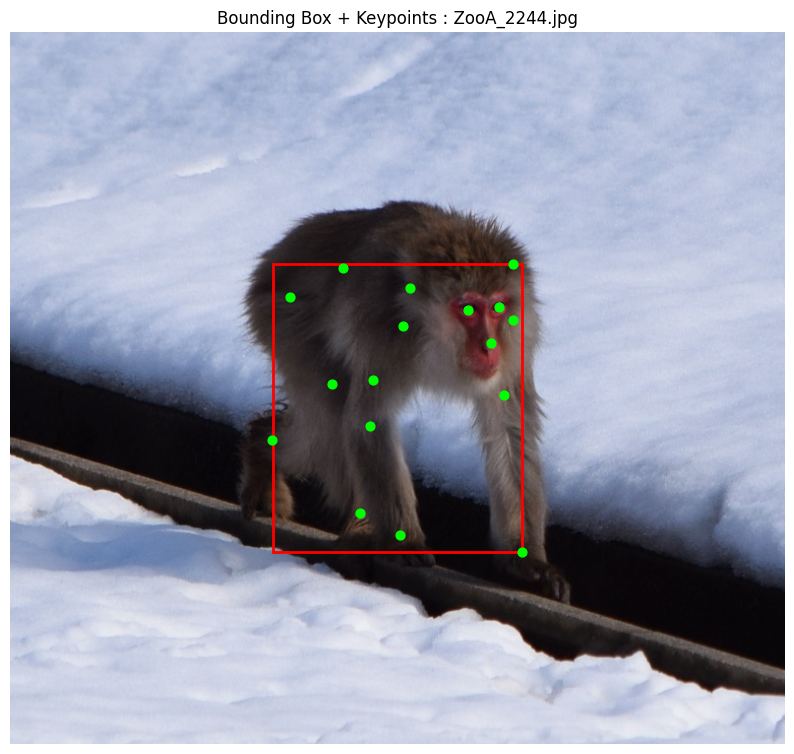

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# ========== CONFIGURATION ==========
# Chemins
images_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/images"
labels_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/labels"

# Choisir une image spécifique
image_name = "ZooA_2244.jpg"
image_path = os.path.join(images_dir, image_name)
label_path = os.path.join(labels_dir, image_name.replace('.jpg', '.txt'))

# Charger l'image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

# Charger le label
with open(label_path, "r") as f:
    content = list(map(float, f.readline().strip().split()))

# Extraire bbox et keypoints
center_x, center_y, bbox_width, bbox_height = content[1:5]
keypoints = np.array(content[5:]).reshape(-1, 3)

# Calculer bbox absolue
xmin = int((center_x - bbox_width/2) * w)
ymin = int((center_y - bbox_height/2) * h)
xmax = int((center_x + bbox_width/2) * w)
ymax = int((center_y + bbox_height/2) * h)

# Afficher l'image
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(img)
ax.axis('off')
ax.set_title(f"Bounding Box + Keypoints : {image_name}")

# Dessiner bbox
rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Dessiner keypoints
for x, y, v in keypoints:
    if v > 0:
        abs_x = int(x * w)
        abs_y = int(y * h)
        ax.scatter(abs_x, abs_y, color='lime', s=40)

plt.show()


# **Split en Train/Val**

**But :** Diviser les données en ensembles d'entraînement (90%) et validation (10%).

**Étapes :** Utilisation de random.shuffle et shutil.copy.



In [ ]:
import os
import random
import shutil

#  Dossiers
subset_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset"
images_dir = os.path.join(subset_dir, "images")
labels_dir = os.path.join(subset_dir, "labels")

train_images_dir = os.path.join(subset_dir, "train", "images")
train_labels_dir = os.path.join(subset_dir, "train", "labels")
val_images_dir = os.path.join(subset_dir, "val", "images")
val_labels_dir = os.path.join(subset_dir, "val", "labels")

#  Créer les dossiers
for folder in [train_images_dir, train_labels_dir, val_images_dir, val_labels_dir]:
    os.makedirs(folder, exist_ok=True)

#  Liste des images
all_images = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
random.seed(42)
random.shuffle(all_images)

#  Split 90% Train, 10% Val
split_idx = int(0.9 * len(all_images))
train_list = all_images[:split_idx]
val_list = all_images[split_idx:]

#  Déplacer les fichiers
for img_name in train_list:
    shutil.copy(os.path.join(images_dir, img_name), os.path.join(train_images_dir, img_name))
    label_name = img_name.replace('.jpg', '.txt')
    shutil.copy(os.path.join(labels_dir, label_name), os.path.join(train_labels_dir, label_name))

for img_name in val_list:
    shutil.copy(os.path.join(images_dir, img_name), os.path.join(val_images_dir, img_name))
    label_name = img_name.replace('.jpg', '.txt')
    shutil.copy(os.path.join(labels_dir, label_name), os.path.join(val_labels_dir, label_name))

print(f"✅ Split terminé : {len(train_list)} train, {len(val_list)} val")


✅ Split terminé : 1062 train, 119 val


# **Créer dataset.yaml pour YOLOv8 Pose :**

In [ ]:
import os
#  Dossiers
subset_dir = "/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset"
images_dir = os.path.join(subset_dir, "images")
labels_dir = os.path.join(subset_dir, "labels")
dataset_yaml_content = f"""


path: /content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset
train: train/images
val: val/images

nc: 1
names: ['macaque']

pose: 17

kpt_shape: [17, 3]

"""

# Sauvegarde
with open(os.path.join(subset_dir, "dataset.yaml"), "w") as f:
    f.write(dataset_yaml_content.strip())

print("✅ dataset.yaml créé !")


✅ dataset.yaml créé !


### *Création automatique du fichier dataset.yaml*

Afin de rendre notre subset compatible avec le framework **YOLOv8 Pose**, nous avons généré dynamiquement un fichier `dataset.yaml` contenant les informations suivantes :
-  Le chemin vers les images d'entraînement et de validation.
-  Le nombre de classes (ici, 1 seule : `'macaque'`).
-  Le nombre de keypoints (`17`) et leur format (`[17, 3]` → x, y, visibilité).

=>Ce fichier est essentiel pour permettre à YOLOv8 de comprendre la structure du dataset MacaquePose lors du fine-tuning.

# **entraîner YOLOv8 Pose :**

###***Entraînement du modèle YOLOv8m-pose***

**But :** Affiner le modèle YOLOv8m-pose sur le dataset MacaquePose pour apprendre les caractéristiques spécifiques aux postures des macaques.

**Méthode :** on a choisis d'entrainer le modéle sur 8 epochs et ce nombre d’epochs a été choisi de manière stratégique pour s’adapter aux ressources limitées de la plateforme Google Colab (RAM et GPU), tout en permettant une convergence raisonnable du modèle.

**Observation :**  
- Les pertes (losses) diminuent progressivement au fil des epochs.  
- Les métriques de précision, rappel et mAP (bounding box et keypoints) montrent une nette amélioration, prouvant que le modèle apprend efficacement.


In [ ]:
!yolo version


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.128


In [ ]:
!yolo pose train model=yolov8m-pose.pt data=/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/dataset.yaml epochs=8 imgsz=320 batch=4


100% 50.8M/50.8M [00:00<00:00, 210MB/s]
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=8, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=

# **Analyse de l'entraînement**

## **Tracer les pertes (losses)**

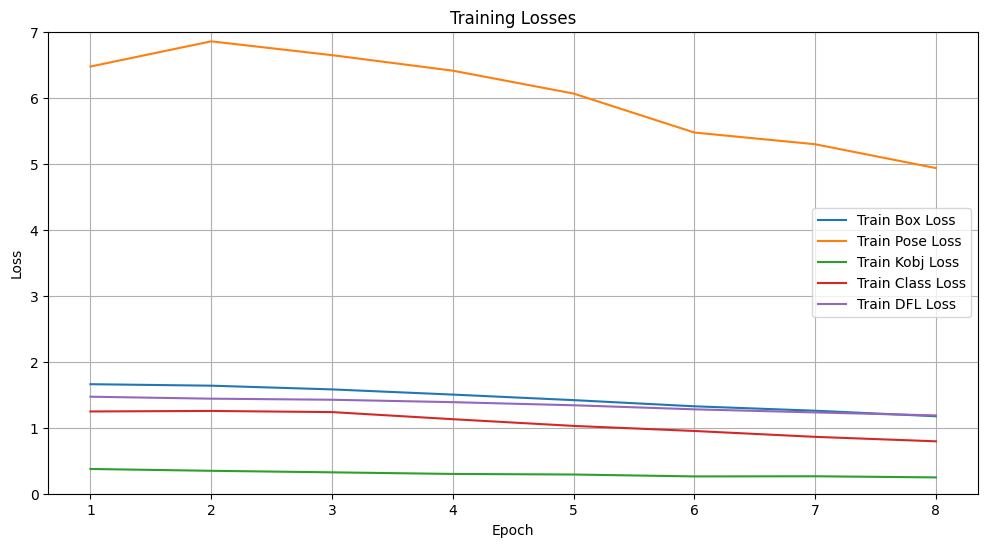

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le CSV
results_csv = "runs/pose/train/results.csv"
df = pd.read_csv(results_csv)
df.columns = df.columns.str.strip()

epochs = range(1, len(df) + 1)


plt.figure(figsize=(12, 6))
plt.plot(epochs, df['train/box_loss'], label='Train Box Loss')
plt.plot(epochs, df['train/pose_loss'], label='Train Pose Loss')
plt.plot(epochs, df['train/kobj_loss'], label='Train Kobj Loss')
plt.plot(epochs, df['train/cls_loss'], label='Train Class Loss')
plt.plot(epochs, df['train/dfl_loss'], label='Train DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.xticks(epochs)
plt.ylim(0, 7)
plt.grid(True)
plt.legend()
plt.show()





**Interprétation :**   Les courbes montrent une diminution constante des différentes pertes (box, pose, cls, dfl). Cela indique un bon apprentissage du modèle, avec une stabilité progressive.


## **Tracer les métriques Bounding Box**

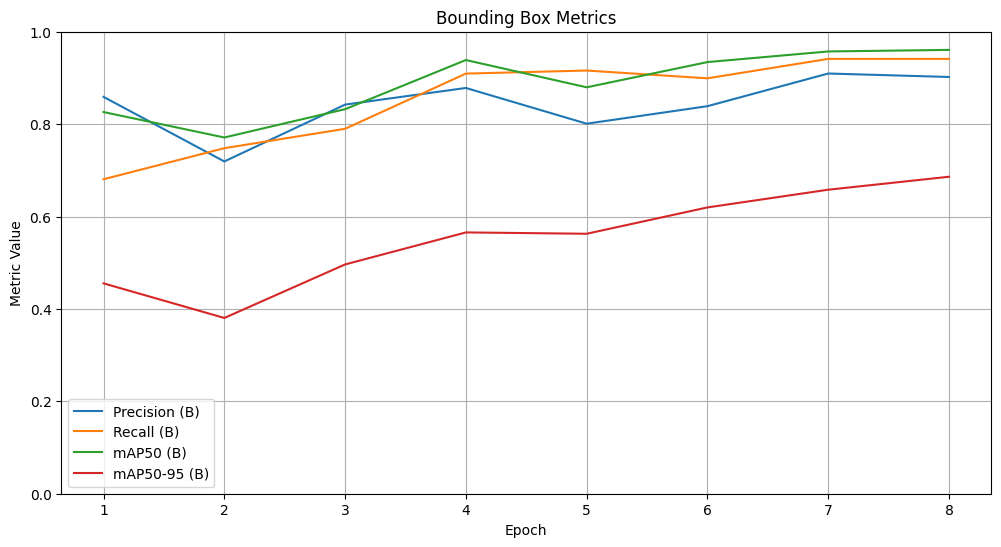

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(epochs, df['metrics/precision(B)'], label='Precision (B)')
plt.plot(epochs, df['metrics/recall(B)'], label='Recall (B)')
plt.plot(epochs, df['metrics/mAP50(B)'], label='mAP50 (B)')
plt.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP50-95 (B)')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Bounding Box Metrics')
plt.xticks(epochs)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

## **Tracer les métriques Pose**

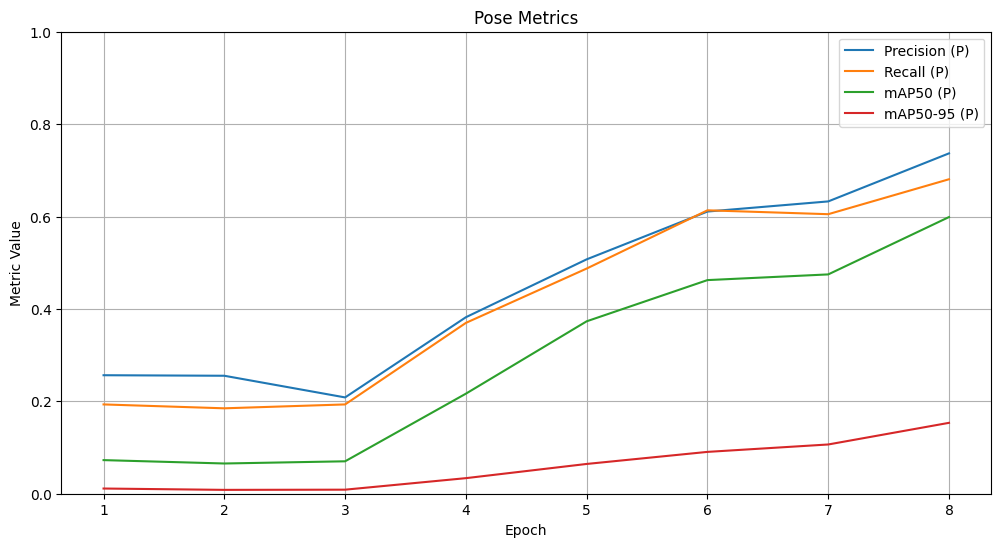

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(epochs, df['metrics/precision(P)'], label='Precision (P)')
plt.plot(epochs, df['metrics/recall(P)'], label='Recall (P)')
plt.plot(epochs, df['metrics/mAP50(P)'], label='mAP50 (P)')
plt.plot(epochs, df['metrics/mAP50-95(P)'], label='mAP50-95 (P)')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Pose Metrics')
plt.xticks(epochs)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


-  **Performances (Bounding Box & Pose)** :  
  Les métriques comme la précision, le rappel et les mAP montrent une progression claire. On note :

  - Un **mAP50(B)** dépassant 0.95 à la fin, excellent pour la localisation de l’animal.
  - Une **mAP50(P)** atteignant environ 0.6, confirmant que le modèle apprend efficacement les keypoints corporels du macaque.
  - Le **mAP50-95(P)** reste faible (0.15), ce qui est attendu avec peu d’epochs et un dataset restreint.


=>*Cette phase valide le **fine-tuning** effectué sur le dataset filtré. Le modèle s'est montré capable de généraliser les poses du macaque avec un entraînement court mais efficace.*


# **Calcul automatique de la qualité du modèle :**

In [ ]:
from ultralytics import YOLO

# Charger le modèle best.pt
model = YOLO('runs/pose/train/weights/best.pt')

# Faire une évaluation complète
metrics = model.val(
    data='/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/dataset.yaml',  # le fichier yaml
    imgsz=640,
    split='val',  # validation set
    save_json=True
)

# Afficher les résultats
print(metrics)


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8m-pose summary (fused): 101 layers, 26,447,596 parameters, 0 gradients, 81.0 GFLOPs
val: Fast image access ✅ (ping: 4.1±7.8 ms, read: 57.9±34.5 MB/s, size: 1527.3 KB)


val: Scanning /content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/val/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [03:11<00:00, 23.91s/it]


                   all        119        119      0.854      0.784      0.838      0.496      0.503      0.429      0.329     0.0607
Speed: 6.0ms preprocess, 1508.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving runs/pose/val/predictions.json...
Results saved to runs/pose/val
ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e096d10d990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.

# **2. Analyser visuellement les résultats:**

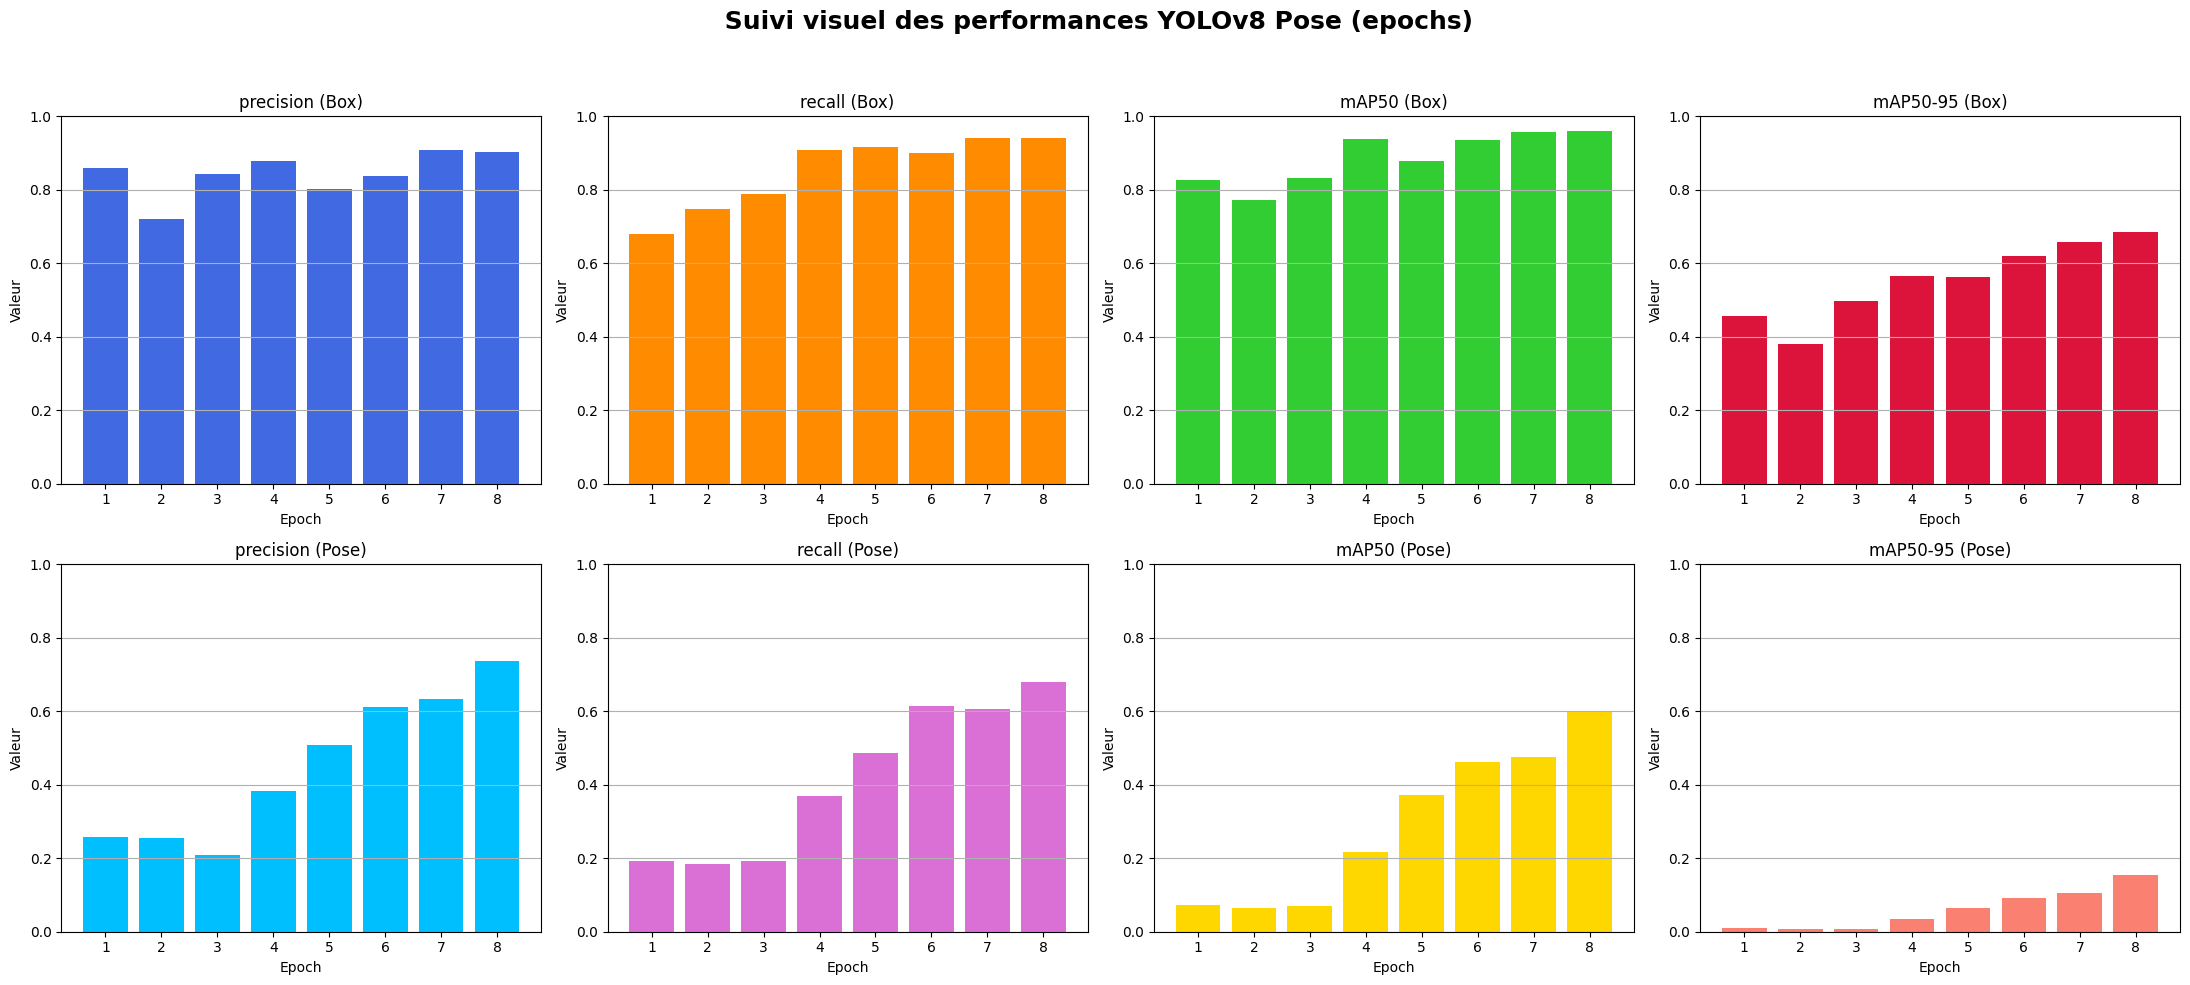

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#  Charger le CSV
results_csv = 'runs/pose/train/results.csv'
df = pd.read_csv(results_csv)
df.columns = df.columns.str.strip()

#  Colonnes à tracer
metrics_columns = [
    'metrics/precision(B)', 'metrics/recall(B)',
    'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
    'metrics/precision(P)', 'metrics/recall(P)',
    'metrics/mAP50(P)', 'metrics/mAP50-95(P)'
]

# Couleurs pour les barres
colors = [
    'royalblue', 'darkorange',
    'limegreen', 'crimson',
    'deepskyblue', 'orchid',
    'gold', 'salmon'
]


epochs = df['epoch'].astype(int)

fig, axs = plt.subplots(2, 4, figsize=(22, 10))
axs = axs.flatten()

for idx, metric in enumerate(metrics_columns):
    axs[idx].bar(epochs, df[metric], color=colors[idx])
    axs[idx].set_title(metric.replace('metrics/', '').replace('(B)', ' (Box)').replace('(P)', ' (Pose)'), fontsize=12)
    axs[idx].set_xlabel('Epoch')
    axs[idx].set_ylabel('Valeur')
    axs[idx].set_xticks(epochs)
    axs[idx].set_ylim(0, 1)
    axs[idx].grid(axis='y')

plt.suptitle(' Suivi visuel des performances YOLOv8 Pose (epochs)', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# **Analyse qualitative a travers les prédictions**

Après avoir réalisé **une analyse quantitative** approfondie à partir des métriques classiques (mAP, Recall, Precision), il était essentiel de compléter l’évaluation par **une analyse qualitative**, c’est-à-dire visualiser concrètement les prédictions du modèle sur des images.

In [ ]:
# 1. Import
from ultralytics import YOLO

# 2. Charger ton modèle entraîné
model = YOLO('runs/pose/train/weights/best.pt')

# 3. Prédire sur quelques images de validation
results = model.predict(
    source='/content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/val/images',
    save=True,  # pour sauvegarder les images avec keypoints prédits
    imgsz=640,  # même taille d'image que pendant train
    conf=0.25,  # seuil de confiance pour afficher
    show=True   # pour voir directement
)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/119 /content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/val/images/10cb12cc498319ca.jpg: 416x640 (no detections), 1245.1ms
image 2/119 /content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/val/images/24dad82840e84d13.jpg: 640x512 1 macaque, 1359.7ms
image 3/119 /content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/val/images/3f296351c9540c78.jpg: 480x640 1 macaque, 1088.2ms
image 4/119 /content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/val/images/4324dbd34f36e01d.jpg: 448x640 1 macaque, 1009.7ms
image 5/119 /content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/val/images/4e59b44177c635da.jpg: 448x640 5 macaques, 996.5ms
image 6/119 /content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/val/images/555dae39a6610444.jpg: 640x448 2 macaques, 1365.9ms
image 7/119 /content/drive/MyDrive/macaquepose_v1_unzipped/macaquepose_subset/val/im

#***afficher les images de prédiction :***


Nous avons affiché un échantillon d'images issues du dossier val/images, sur lesquelles le modèle a prédi les poses des macaques. Ces prédictions se matérialisent par :

des squelettes de keypoints correctement positionnés sur les corps des animaux,

des bounding boxes bleues encadrant chaque macaque détecté.

=>Globalement, les résultats sont visuellement cohérents et précis, même sur des images complexes avec la présence de quelque erreur de prédiction

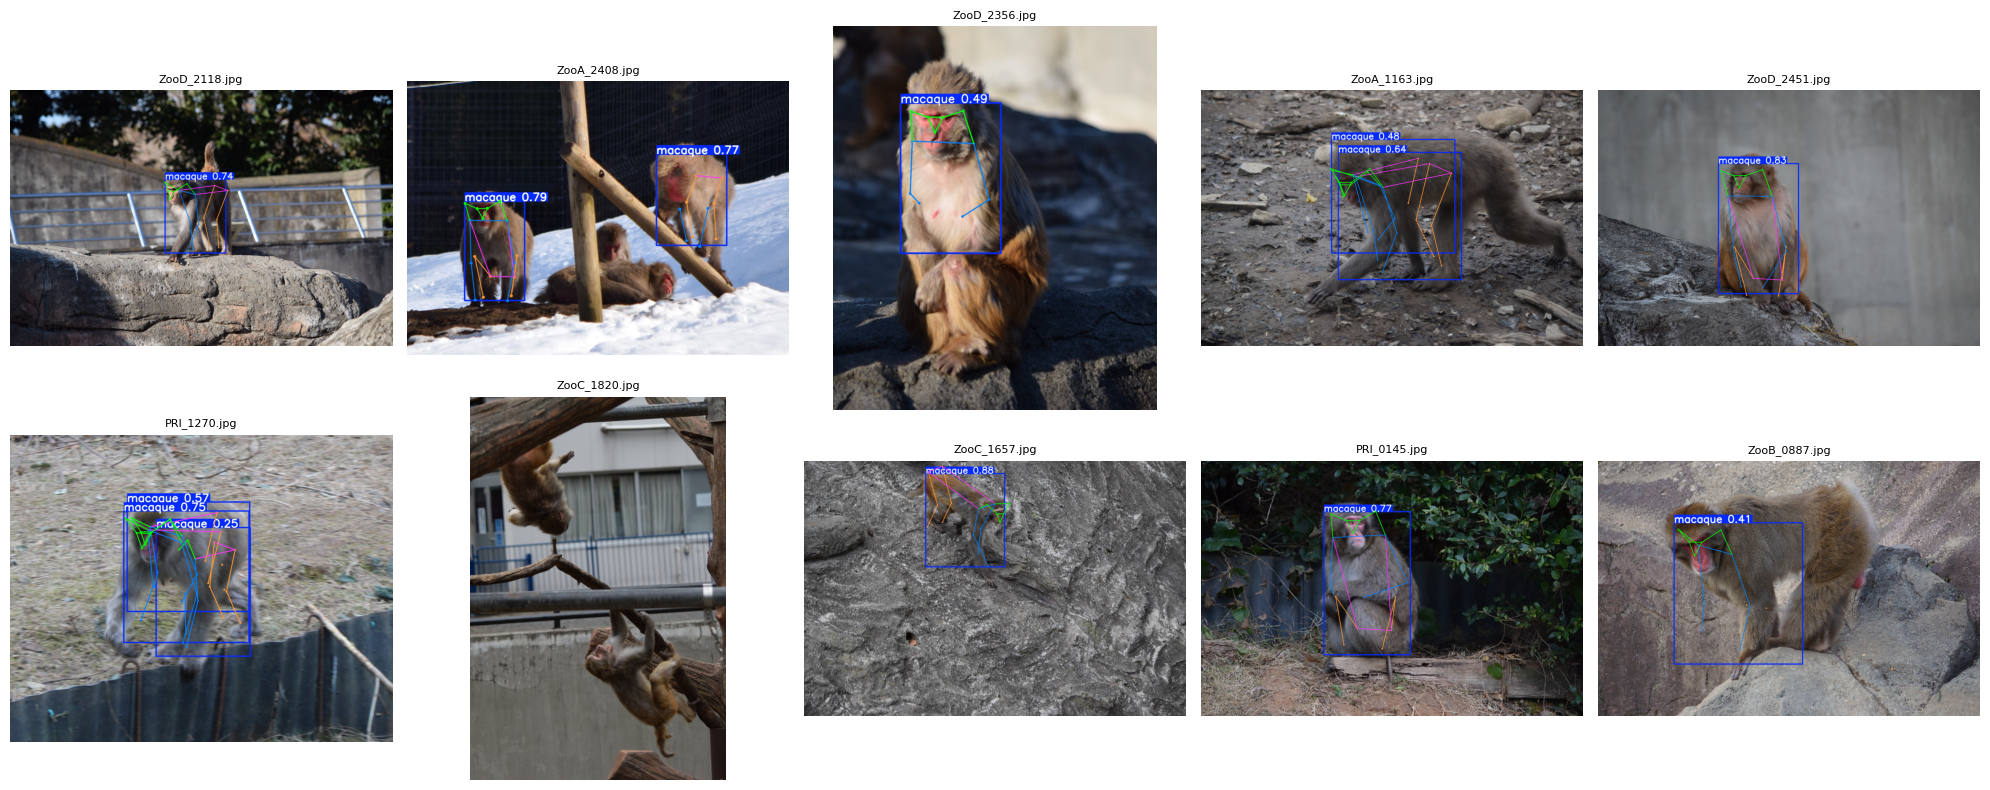

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

#  Chemin vers le dossier des résultats prédits
predicted_dir = "runs/pose/predict"

# Lister les images
predicted_images = [f for f in os.listdir(predicted_dir) if f.endswith(('.jpg', '.png'))]

# Fonction pour lire keypoints + bbox
def read_keypoints_and_bbox(label_path, w, h):
    keypoints_list = []
    bboxes_list = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = list(map(float, line.strip().split()))
                center_x, center_y, box_w, box_h = parts[1:5]
                bbox = [
                    int((center_x - box_w/2) * w),
                    int((center_y - box_h/2) * h),
                    int(box_w * w),
                    int(box_h * h)
                ]
                bboxes_list.append(bbox)

                keypoints = parts[5:]
                xs = keypoints[0::3]
                ys = keypoints[1::3]
                points = []
                for x, y in zip(xs, ys):
                    if x > 0 and y > 0:
                        abs_x = int(x * w)
                        abs_y = int(y * h)
                        points.append((abs_x, abs_y))
                keypoints_list.append(points)
    return keypoints_list, bboxes_list

# Préparer l'affichage de 10 images
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()

for idx, img_name in enumerate(predicted_images[:10]):  #
    img_path = os.path.join(predicted_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    label_path = img_path.replace('predict', 'predict/labels').replace('.jpg', '.txt').replace('.png', '.txt')
    keypoints_list, bboxes_list = read_keypoints_and_bbox(label_path, w, h)

    axs[idx].imshow(img)
    axs[idx].axis('off')
    axs[idx].set_title(img_name, fontsize=8)

    # Dessiner les bounding boxes
    for bbox in bboxes_list:
        rect = patches.Rectangle(
            (bbox[0], bbox[1]),
            bbox[2], bbox[3],
            linewidth=2, edgecolor='blue', facecolor='none'
        )
        axs[idx].add_patch(rect)

    # Dessiner les keypoints rouges
    for points in keypoints_list:
        for (x, y) in points:
            axs[idx].scatter(x, y, color='red', s=20)

plt.tight_layout()
plt.show()


# **Statistiques issues de la prédiction:Confiance moyenne des prédictions YOLOv8m-pose sur les images**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


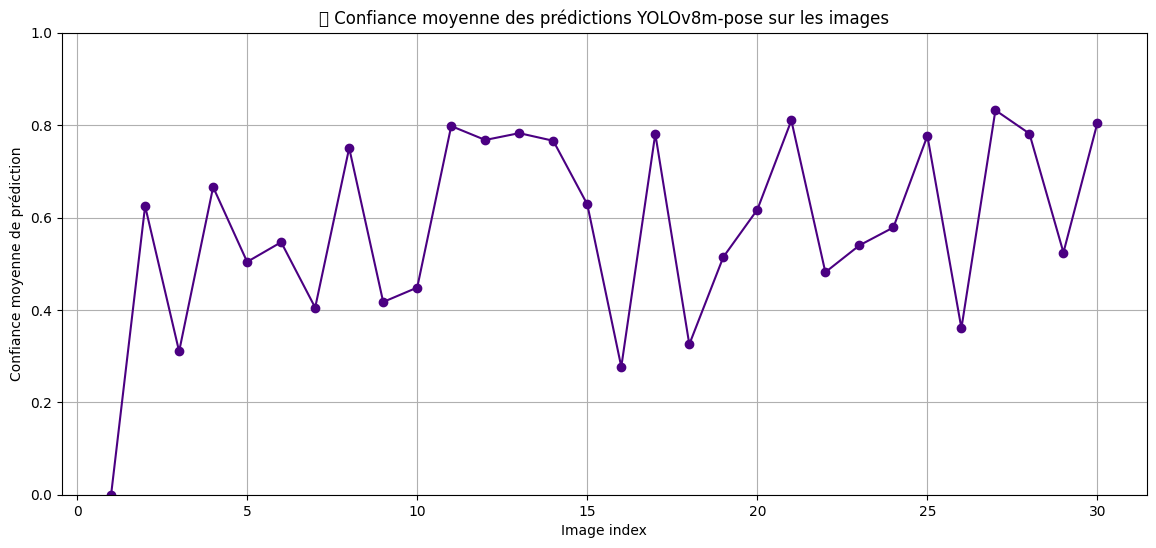

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#  Extraire la confiance de chaque prédiction (moyenne par image)
confiance_moyenne_par_image = []

for r in results:
    if hasattr(r, 'boxes') and r.boxes is not None and r.boxes.conf is not None:
        confs = r.boxes.conf.cpu().numpy()
        if len(confs) > 0:
            moyenne = np.mean(confs)
            confiance_moyenne_par_image.append(moyenne)
        else:
            confiance_moyenne_par_image.append(0)
    else:
        confiance_moyenne_par_image.append(0)

#  Limiter aux 30 premières images
confiance_moyenne_par_image = confiance_moyenne_par_image[:30]

#  Tracer
plt.figure(figsize=(14, 6))
plt.plot(range(1, len(confiance_moyenne_par_image) + 1), confiance_moyenne_par_image, marker='o', linestyle='-', color='indigo')
plt.ylim(0, 1)
plt.xlabel('Image index')
plt.ylabel('Confiance moyenne de prédiction')
plt.title(' Confiance moyenne des prédictions YOLOv8m-pose sur les images')
plt.grid(True)
plt.show()


Nous avons aussi calculé la confiance moyenne des prédictions YOLOv8m-pose sur un échantillon de 30 images.

🔹 Les prédictions sont majoritairement supérieures à 70%, ce qui montre une bonne stabilité du modèle.

🔹 Certaines images présentent une confiance plus basse, généralement liées à :

* des postures ambiguës,

* des parties du corps partiellement visibles,

*  des images floues.

#***Conclusion générale***

Ce projet a permis de démontrer l’efficacité du modèle **YOLOv8m-pose** pour l’estimation de pose animale, à travers un fine-tuning ciblé sur le dataset **MacaquePose**.

Grâce à une démarche structurée combinant :

- une **préparation rigoureuse des données** (subset nettoyé),
- un **entraînement maîtrisé** (8 epochs optimisés selon les ressources Colab),
- et une **double analyse** (*quantitative* via les métriques, *qualitative* via les visualisations),

nous avons pu observer une nette amélioration des performances du modèle, notamment sur la précision des keypoints.

Les résultats obtenus montrent une **courbe d'apprentissage cohérente**, avec une augmentation progressive des scores mAP, et une fiabilité satisfaisante des prédictions sur images réelles.

 Ce travail peut servir de base à des projets plus larges sur d’autres espèces ou contextes (environnement naturel, multi-animal, comportement).
